In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
!ls

benchmark.py				get_nvidia_versions.sh	results
benchmark_VGG16_QuadroP2000.ipynb	__init__.py		run_bm.sh
benchmark_VGG16_QuadroP2000keras.ipynb	multigpuexec.py		run_series.py
data					multigpuexec.pyc	utils_tf
Dockerfile				README.md


In [3]:
csv_file = "results/benchmark_VGG16_QuadroP2000_20190921.csv"
df = pd.read_csv(csv_file,
                 header=None,
                 names=[
                     "operation", "imsize", "precision", "batchsize",
                     "time(ms)", "throughput(img/sec)", "mem", "comment"
                 ],
                 dtype={
                     "imsize": int,
                     "precision": int,
                     "batchsize": int,
                     "time(ms)":float
                 })
print(df.columns, df.dtypes)
df.head()

Index(['operation', 'imsize', 'precision', 'batchsize', 'time(ms)',
       'throughput(img/sec)', 'mem', 'comment'],
      dtype='object') operation               object
imsize                   int64
precision                int64
batchsize                int64
time(ms)               float64
throughput(img/sec)    float64
mem                      int64
comment                 object
dtype: object


,operation,imsize,precision,batchsize,time(ms),throughput(img/sec),mem,comment
0,keras VGG-16,32,32,7,51.036,137.157,0,mouse
1,keras VGG-16,32,32,8,51.147,156.413,0,mouse
2,keras VGG-16,32,32,9,51.637,174.294,0,mouse
3,keras VGG-16,32,32,10,52.473,190.573,0,mouse
4,keras VGG-16,32,32,20,58.111,344.170,0,mouse


In [4]:
df = df.groupby(by=["operation","imsize","precision","batchsize"], as_index=False).agg(np.mean)
df.sort_values(by=["batchsize"],inplace=True)
df.head()

,operation,imsize,precision,batchsize,time(ms),throughput(img/sec),mem
0,keras VGG-16,32,32,7,51.036,137.157,0
1,keras VGG-16,32,32,8,51.147,156.413,0
2,keras VGG-16,32,32,9,51.637,174.294,0
3,keras VGG-16,32,32,10,52.473,190.573,0
4,keras VGG-16,32,32,20,58.111,344.170,0


In [5]:
datasize = 50000.
df["iterations"] = np.ceil(datasize/df["batchsize"])
df["epoch_time"] = df["iterations"] * df["time(ms)"] / 1000.
df.head()

,operation,imsize,precision,batchsize,time(ms),throughput(img/sec),mem,iterations,epoch_time
0,keras VGG-16,32,32,7,51.036,137.157,0,7143.0,364.550148
1,keras VGG-16,32,32,8,51.147,156.413,0,6250.0,319.668750
2,keras VGG-16,32,32,9,51.637,174.294,0,5556.0,286.895172
3,keras VGG-16,32,32,10,52.473,190.573,0,5000.0,262.365000
4,keras VGG-16,32,32,20,58.111,344.170,0,2500.0,145.277500


Text(0.5, 1.0, 'results/benchmark_VGG16_QuadroP2000_20190921.csv')

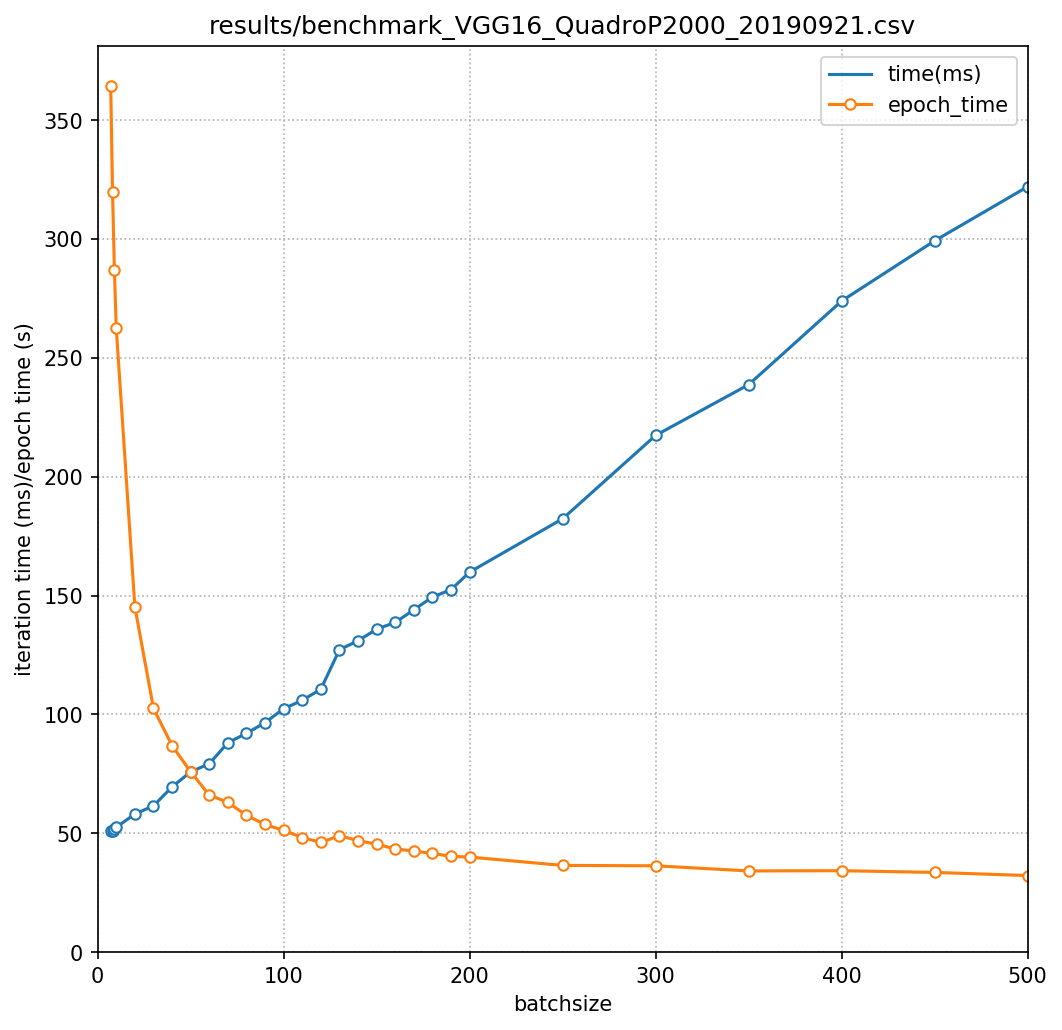

In [7]:
fig,ax = plt.subplots(figsize=(8,8),dpi=150)
df.plot("batchsize","time(ms)",ms=5,marker="o", markerfacecolor="white",ax=ax)
df.plot("batchsize","epoch_time",ms=5,marker="o", markerfacecolor="white",ax=ax)
ax.set_xlim(0,500)
ax.set_ylim(0,None)
ax.set_ylabel("iteration time (ms)/epoch time (s)")
ax.grid(ls=":")
ax.set_title(csv_file)